In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px
import statsmodels.api as sm

#### Exploring Dataset and Gaining Insights

In [ ]:
# Loading the original dataset 
ikea_data = pd.read_csv("C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab3_Clustering/ikea_kommun_data.txt", delimiter = '\t', encoding = 'latin1')

# See the structure of data
ikea_data.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [98]:
# Understanding the data types
# ikea_data.describe(include = object)
ikea_data.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [99]:
# Showing Missing Value Counts and Percentages

# Analyzing missing values
missing_count = ikea_data.isnull().sum()
missing_percent = (missing_count / len(ikea_data)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)

# Display summary
missing_summary

,Missing Count,Missing %
Kommun_code,0,0.0
Year,0,0.0
Kommun_name,0,0.0
Revenue,0,0.0
Employee,0,0.0
Population,0,0.0
Population_University,0,0.0
Percent_University,0,0.0
Productivity,0,0.0
SalesIndex,0,0.0


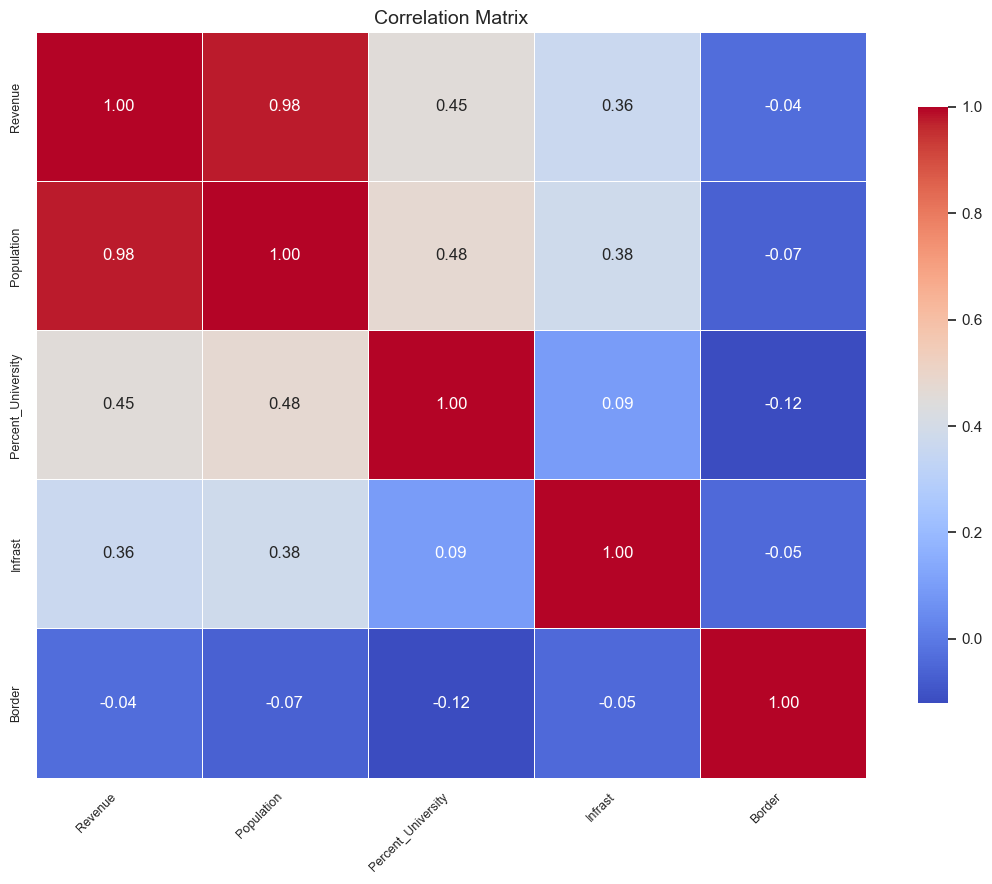

In [100]:
# Select numerical features
num_cols = [
    'Revenue', 'Population', 'Percent_University', 'Infrast', 'Border'
]

# Creating clear Correlation Heatmap 

# Set seaborn visual style
sns.set(style="whitegrid")

# Compute correlation matrix
correlation = ikea_data[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(11, 9))
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    xticklabels=1,
    yticklabels=1,
    cbar_kws={"shrink": 0.8}
)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

 Comments: Looked at the data types of all variables, especially numerical variables as they are required for clustering. Excluded the variables Kommun_code= ID, Year (all 2010 and it's unnecessary), Population_University (as it is similar as Percent_University), Productivity (derived from Revenue) and SalesIndex (Will be higher where IKEA store is present and is highly correlated with Revenue). Including variables: Revenue, Population, Percent_University, Infrast, Border. Correlation heatmap shows Revenue, Population are highly correlated both are still retained as PCA balances out correlated variables in loadings.  Percent_University and Infrast show low correlation with almost all variables. Border variable shows negative correlation with all variables.

#### Transforming Data (Standardizing Data)

In [101]:
# Initialize and apply scaler
scaler = StandardScaler()
ikea_data_scaled = ikea_data.copy()
ikea_data_scaled[num_cols] = scaler.fit_transform(ikea_data_scaled[num_cols])

ikea_data_scaled.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,0.017184,276,-0.366968,719,-0.639005,195.74174,111.075774,-0.225303,4.987484
1,880,2010,Kalmar,1.025973,1621,0.423730,8716,1.015597,117.17365,390.516869,-0.225303,-0.200502
2,1780,2010,Karlstad,1.312392,1910,0.767521,13308,1.419745,119.64794,469.856708,-0.225303,-0.200502
3,114,2010,Upplands Väsby,0.124312,708,0.071126,4419,0.369223,96.69215,140.750935,-0.225303,-0.200502
4,115,2010,Vallentuna,-0.320194,99,-0.066387,3843,0.741587,86.56347,17.619627,-0.225303,-0.200502


#### Choosing the number of clusters using Elbow and Silhouette Method

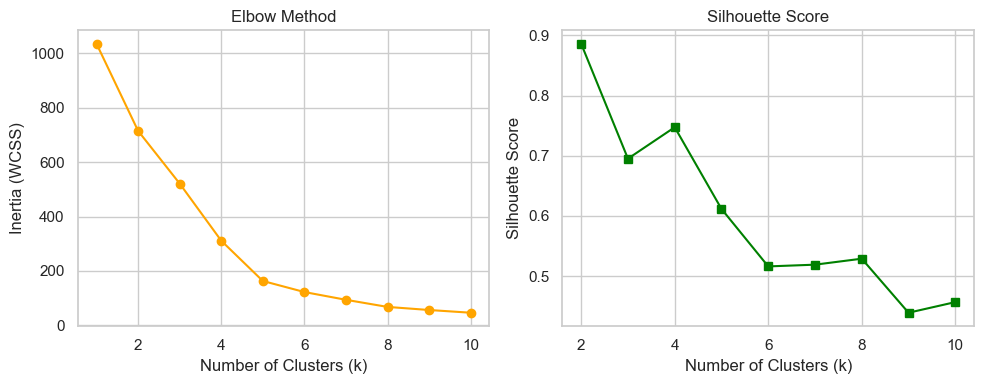

In [102]:
# Clustering Steps 

# Elbow & Silhouette Analysis
inertias = []             # For Elbow method
silhouette_scores = []    # For silhouette analysis
K_range = range(1, 11)    # clusters from 1 to 10 for ELbow Method
SL_range = range(2, 11)    # clusters from 2 to 10 for Silhouette Method

# Loop to calculate metrics for each k for all numerical columns
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    labels = kmeans.fit_predict(ikea_data_scaled[num_cols])  # Apply to scaled features
    inertias.append(kmeans.inertia_)                  # Save inertia (WCSS)

for k in SL_range:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    labels = kmeans.fit_predict(ikea_data_scaled[num_cols])  # Apply to scaled features
    score = silhouette_score(ikea_data_scaled[num_cols], labels)
    silhouette_scores.append(score)  # Save silhouette score

# Plot the results
plt.figure(figsize=(10, 4))

# Plot Elbow method
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o', color='orange')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(SL_range, silhouette_scores, marker='s', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Comments: Standardized the data for clustering. Applied Elbow and Silhouette Method to find the optimal number of clusters needed. Elbow Method shows optimal number k=4 and Silhouette Method shows k=2. Hence I tried for both options to see which ones seems better in PCA. 

#### Checking for k=2, Reducing Dimensionality of data and Visualizing data using PCA

In [103]:
# Fit the KMeans model for number of clusters = 2
kmeans_model1 = KMeans(n_clusters=2, random_state=12, n_init=10)
ikea_data_1 = ikea_data.copy()
ikea_data_1['Cluster'] = kmeans_model1.fit_predict(ikea_data_scaled[num_cols])

# Get cluster-wise summary (median of features for each cluster)
cluster_summary1 = ikea_data_1.groupby('Cluster')[num_cols].median().round(2)
# Displaying cluster summary (k=2)
display(cluster_summary1)

,Revenue,Population,Percent_University,Infrast,Border
Cluster,,,,,
0,250.5,16379.5,0.09,0.0,0.0
1,32897.0,847073.0,0.23,1.0,0.0


In [104]:

# Clustering Visualization using PCA (Principal Component Analysis)

# Using scaled DataFrame
df_viz = ikea_data_1.copy() 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ikea_data_scaled[num_cols])

# Adding PCA components to DataFrame
df_viz['PCA1'] = pca_result[:, 0]
df_viz['PCA2'] = pca_result[:, 1]

# Ensuring 'Cluster' is treated as categorical 
df_viz['Cluster'] = df_viz['Cluster'].astype(str)  # Critical for color mapping

# Cluster labels
cluster_labels = {
    '0': 'Cluster 0',
    '1': 'Cluster 1'
    
}
df_viz['Cluster_Label'] = df_viz['Cluster'].map(cluster_labels)

label_order = [
    'Cluster 0',
    'Cluster 1'
]

# Custom colors, with Cluster 0 set to blue
custom_colors = ['#1f78b4',   
                 '#33a02c']   
                  
                  
# Creating the interactive PCA plot
fig = px.scatter(
    df_viz,
    x='PCA1',
    y='PCA2',
    color='Cluster_Label',
    category_orders={"Cluster_Label": label_order},
    color_discrete_sequence=custom_colors,  
    hover_name='Kommun_name',
    title='PCA Cluster Plot by Kommun',
    width=900,
    height=600,
    opacity=0.9  # Slightly transparent for overlap clarity
)

# Enhance marker visibility
fig.update_traces(
    marker=dict(
        size=10,
        line=dict(width=1, color='black'),  # Black borders for contrast
        opacity=0.9
    )
)

# Improve layout readability
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    legend_title='Cluster',
    template='plotly_white',
    font=dict(size=12),
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    )
)

# Displaying plot
fig.show()

Comments: k=2 doesn't seem like optimal number of clusters as it clearly singles out the outlier- Stockholm but doesn't form any other clusters. Hence this might not be helpful to find locations for potential IKEA stores

#### Checking for k=4, Reducing Dimensionality of data and Visualizing data using PCA

In [105]:
# Fit the KMeans model for number of clusters = 4
kmeans_model2 = KMeans(n_clusters=4, random_state=12, n_init=10)
ikea_data_2 = ikea_data.copy()
ikea_data_2['Cluster'] = kmeans_model2.fit_predict(ikea_data_scaled[num_cols])

# Get cluster-wise summary (median of features for each cluster)
cluster_summary2 = ikea_data_2.groupby('Cluster')[num_cols].median().round(2)
# Displaying cluster summary (k=4)
display(cluster_summary2)

,Revenue,Population,Percent_University,Infrast,Border
Cluster,,,,,
0,236.0,16701.0,0.09,0.0,0.0
1,32897.0,847073.0,0.23,1.0,0.0
2,474.0,10933.5,0.07,0.0,1.0
3,748.0,31143.0,0.10,1.0,0.0


In [106]:
# Clustering Visualization using PCA (Principal Component Analysis)

# Using scaled DataFrame
df_viz = ikea_data_2.copy()  
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ikea_data_scaled[num_cols])

# Adding PCA components to DataFrame
df_viz['PCA1'] = pca_result[:, 0]
df_viz['PCA2'] = pca_result[:, 1]

# Ensuring 'Cluster' is treated as categorical 
df_viz['Cluster'] = df_viz['Cluster'].astype(str)  # Critical for color mapping

# Cluster labels
cluster_labels = {
    '0': 'Cluster 0',
    '1': 'Cluster 1',
    '2': 'Cluster 2',
    '3': 'Cluster 3'
    
}
df_viz['Cluster_Label'] = df_viz['Cluster'].map(cluster_labels)

label_order = [
    'Cluster 0',
    'Cluster 1',
    'Cluster 2',
    'Cluster 3'
]

# Custom colors, with Cluster 0 set to a blue
custom_colors = ['#1f78b4',   
                 '#33a02c', 
                 '#e62bc6',
                 '#b40426']  
                  
                  
# Creating the interactive PCA plot
fig = px.scatter(
    df_viz,
    x='PCA1',
    y='PCA2',
    color='Cluster_Label',
    category_orders={"Cluster_Label": label_order},
    color_discrete_sequence=custom_colors,  
    hover_name='Kommun_name',
    title='PCA Cluster Plot by Kommun',
    width=900,
    height=600,
    opacity=0.9  # Slightly transparent for overlap clarity
)

# Enhance marker visibility
fig.update_traces(
    marker=dict(
        size=10,
        line=dict(width=1, color='black'),  # Black borders for contrast
        opacity=0.9
    )
)

# Improve layout readability
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    legend_title='Cluster',
    template='plotly_white',
    font=dict(size=12),
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    )
)

# Displaying plot
fig.show()

In [107]:
# To understand which variables contributed to PCA 1 and PCA 2
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PCA1', 'PCA2'],
    index=num_cols
)

print(loadings)

                        PCA1      PCA2
Revenue             0.598278  0.111017
Population          0.605238  0.078227
Percent_University  0.401860 -0.265846
Infrast             0.327512  0.216226
Border             -0.083638  0.929585


Comments: k=4 seems to be a better solution and it clusters based on Revenue, Population, Percent_University, Infrast and Border variables. The interactive visualization is very helpful in understanding which municipalities belong to which cluster. PCA loadings help understand which variables influence the most clustering and in which direction. In the X axis: Population, Revenue, Percent_University and Infrast influence clustering and in the y-axis Border variable has most influence. It is clear that Cluster 2 has all Border municipalities and CLuster 1 (Stockholm) has the highest Population, highest Revenue, high Percent_Univeristy and Infrast = 1

#### Evaluating cluster to obtain most promising municipalities for IKEA expansion

In [108]:
# List to remove municipalities that have IKEA
existing_ikea_municipalities = [
    "Borlänge", "Gävle", "Göteborg", "Haparanda", "Helsingborg",
    "Jönköping", "Kalmar", "Karlstad", "Linköping", "Malmö", "Stockholm",
    "Sundsvall", "Uddevalla", "Umeå", "Uppsala", "Västerås", "Älmhult", "Örebro"
]

# Tag whether a municipality has IKEA
df_viz['Has_IKEA'] = df_viz['Kommun_name'].isin(existing_ikea_municipalities)

# Frequency of IKEA cities by cluster
ikea_cluster_counts = df_viz[df_viz['Has_IKEA']].groupby('Cluster')['Kommun_name'].count()
print(ikea_cluster_counts)


Cluster
0    8
1    1
2    1
3    2
Name: Kommun_name, dtype: int64


In [109]:
# Using the cluster which has the most IKEAs
target_cluster = '0'

# Filtering non-IKEA municipalities in the same cluster
candidate_municipalities = df_viz[
    (df_viz['Has_IKEA'] == False) & (df_viz['Cluster'] == target_cluster)
]

# Sorting by multiple factors 
top_candidates = candidate_municipalities.sort_values(
    by=['Revenue','Population', 'Percent_University', 'Infrast'],
    ascending=[ False, False, False, False]
)

# Showing top 5
top_5 = top_candidates[['Kommun_name', 'Revenue', 'Population', 'Percent_University', 'Infrast']].head(5)
print(top_5)


    Kommun_name  Revenue  Population  Percent_University  Infrast
9      Huddinge     7153       97453            0.131294        0
7      Järfälla     5119       66211            0.136065        0
53   Norrköping     4438      130050            0.111696        0
132  Falkenberg     4395       41008            0.082813        0
165     Mölndal     3512       60973            0.163384        0


Comments: After clustering is done checking for the clusters which has the most number of IKEAs as this implies that IKEA worked for municipalities belonging to this cluster (cluster 0). Hence selecting potential municipalities based on Revenue, Population, Percent_University and Infrast. The order is important as selecting based on Population but if that municipality has lower revenue then this might not be helpful to have an IKEA in that municipality. Revenue and Population signify the most demand. Hence this justifies the selection of variables. Top 5 kommuns selected: Huddinge, Järfalla, Norrköping, Falkenberg, Mölndal.